In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
data = pd.read_csv('QM9_CN.csv',encoding='gbk')
data.head(15)

,编号,SMILES,InChL,HomoEnergy,LumoEnergy,EnergyGap,偶极矩,极化率
0,5,C#N,1S/CHN/c1-2/h1H,-0.3604,0.0191,0.3796,2.8937,12.99
1,10,CC#N,1S/C2H3N/c1-2-3/h1H3,-0.3264,0.0376,0.3640,3.8266,24.45
2,24,C#CC#N,1S/C3HN/c1-2-3-4/h1H,-0.3102,-0.0543,0.2559,3.7920,32.66
3,25,N#CC#N,1S/C2N2/c3-1-2-4,-0.3696,-0.0926,0.2770,0.0023,27.70
4,31,CCC#N,"1S/C3H5N/c1-2-3-4/h2H2,1H3",-0.3213,0.0340,0.3553,3.9233,35.38
5,32,NCC#N,"1S/C2H4N2/c3-1-2-4/h1,3H2",-0.2683,0.0173,0.2855,4.4361,31.81
6,45,CN1CC1,"1S/C3H7N/c1-4-2-3-4/h2-3H2,1H3",-0.2304,0.0968,0.3271,1.1353,39.02
7,50,N1C=CC=C1,1S/C4H5N/c1-2-4-5-3-1/h1-5H,-0.2029,0.0499,0.2528,1.8689,43.14
8,51,N1C=CN=C1,"1S/C3H4N2/c1-2-5-3-4-1/h1-3H,(H,4,5)",-0.2253,0.0332,0.2585,3.6193,39.13
9,58,NC(=N)C#N,"1S/C2H3N3/c3-1-2(4)5/h(H3,4,5)",-0.2739,-0.0438,0.2301,5.1815,38.31


In [4]:
mols = []
for smile in data["SMILES"]:
    mols.append(Chem.MolFromSmiles(smile))

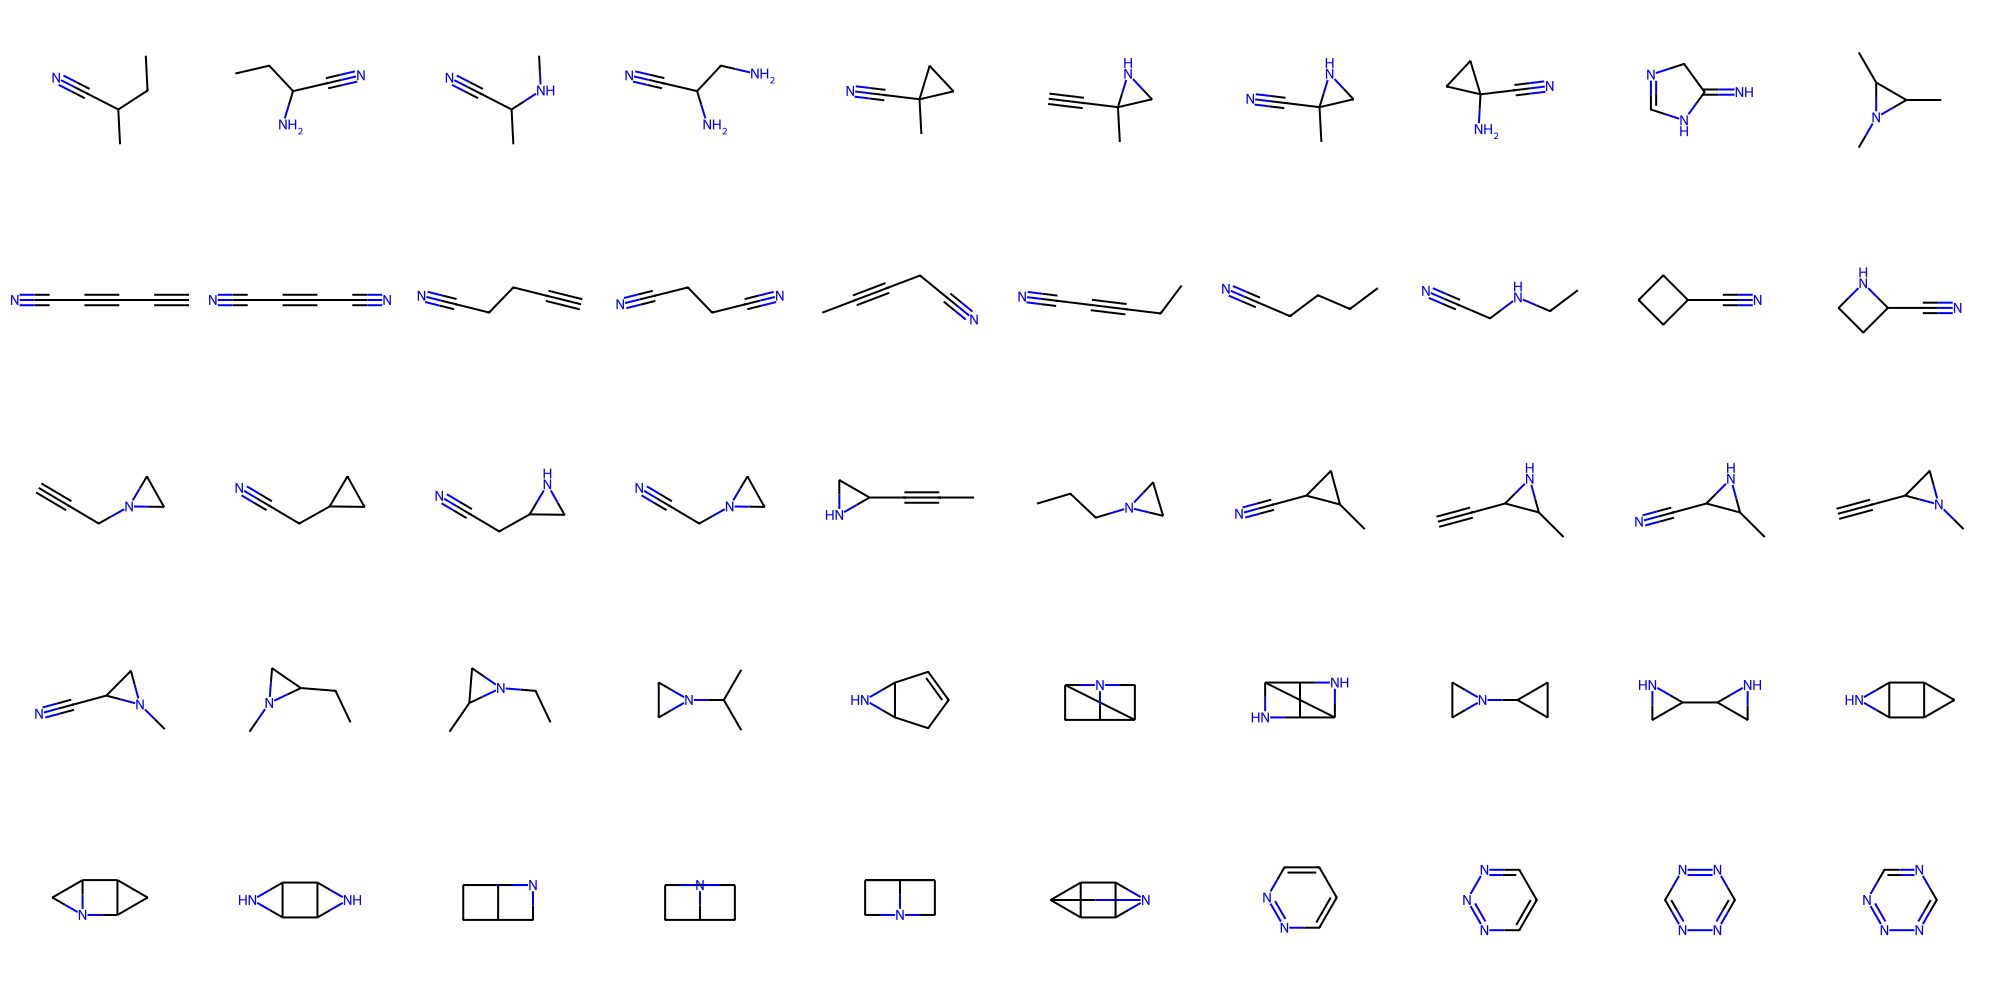

In [6]:
img = Draw.MolsToGridImage(mols[51:101], molsPerRow=10, subImgSize=(200,200),returnPNG=False)

img

In [8]:
data.count

<bound method DataFrame.count of            编号               SMILES  \
0           5                  C#N   
1          10                 CC#N   
2          24               C#CC#N   
3          25               N#CC#N   
4          31                CCC#N   
...       ...                  ...   
14197  133876  C1C2C3C4C5C2C13CN45   
14198  133878  C1C2C3C4C5CC13C2N45   
14199  133879  C1C2C3C4C5CC13N2C45   
14200  133883  C1N2C3C4C5C2C13CN45   
14201  133884  C1N2C3C4C5CC13C2C45   

                                                   InChL  HomoEnergy  \
0                                        1S/CHN/c1-2/h1H     -0.3604   
1                                   1S/C2H3N/c1-2-3/h1H3     -0.3264   
2                                   1S/C3HN/c1-2-3-4/h1H     -0.3102   
3                                       1S/C2N2/c3-1-2-4     -0.3696   
4                             1S/C3H5N/c1-2-3-4/h2H2,1H3     -0.3213   
...                                                  ...         ...   
14197 

In [12]:
max_value = data['EnergyGap'].max()
min_value =data['EnergyGap'].min()
mean_value =data['EnergyGap'].mean()

print("Max Value:", max_value,"Hartree")
print("Min Value:", min_value,"Hartree")
print("Mean Value:", mean_value,"Hartree")
print("\n")
print("Max Value:", max_value*27.2114 ,"eV")
print("Min Value:", min_value*27.2114,"eV")
print("Mean Value:", mean_value*27.2114,"eV")

Max Value: 0.3796 Hartree
Min Value: 0.0376 Hartree
Mean Value: 0.2480948528376285 Hartree


Max Value: 10.329447440000001 eV
Min Value: 1.02314864 eV
Mean Value: 6.751008278505845 eV


In [13]:
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
descriptor_names = [x[0] for x in Descriptors._descList]
descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
len(descriptor_names)

208

In [14]:
descriptor_names

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

In [15]:
descriptors = pd.DataFrame(
    [descriptor_calculator.CalcDescriptors(mol)for mol in mols],
    columns=descriptor_names
)
descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.500000,3.500000,6.500000,3.500000,0.369797,27.026,26.018,27.010899,10,0,...,0,0,0,0,0,0,0,0,0,0
1,7.319444,1.430556,7.319444,1.430556,0.386981,41.053,38.029,41.026549,16,0,...,0,0,0,0,0,0,0,0,0,0
2,7.388889,1.458333,7.388889,1.458333,0.358919,51.048,50.040,51.010899,18,0,...,0,0,0,1,0,0,0,0,0,0
3,7.263889,1.236111,7.263889,1.236111,0.390104,52.036,52.036,52.006148,18,0,...,0,0,0,0,0,0,0,0,0,0
4,7.625000,0.625000,7.625000,0.625000,0.403814,55.080,50.040,55.042199,22,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14197,2.762731,0.972222,2.762731,0.972222,0.414886,119.167,110.095,119.073499,46,0,...,0,0,0,0,0,0,0,0,0,0
14198,2.818287,0.972222,2.818287,0.972222,0.418585,119.167,110.095,119.073499,46,0,...,0,0,0,0,0,0,0,0,0,0
14199,2.854167,0.879630,2.854167,0.879630,0.447559,119.167,110.095,119.073499,46,0,...,0,0,0,0,0,0,0,0,0,0
14200,2.721065,0.898148,2.721065,0.898148,0.382870,120.155,112.091,120.068748,46,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
descriptors = descriptors.astype(np.float32)


In [17]:
descriptors.to_pickle('rdkit_descriptors(208).pkl')

In [18]:

labels = data['EnergyGap'].astype(np.float32)
labels.to_pickle('EnergyGap.pkl')